# Mushroom Classification - Safe to eat or deadly poison?
### 6 Ambiguous Features

Group 6: Rui Li, Xi Yang, Ava (Yan) Zhang 
<br>Last Updated: 17 Mar 2021

## 1. Dataset Description


In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import*
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
mushroom_df = pd.read_csv('mushrooms_ambiguous_6feat.csv')
mushroom_df.head()

,Unnamed: 0,class,cap-color,gill-spacing,stalk-surface-above-ring,stalk-color-above-ring,veil-color,habitat
0,0,p,n,c,s,w,w,u
1,1,e,y,c,s,w,w,g
2,2,e,w,c,s,w,w,m
3,3,p,w,c,s,w,w,u
4,4,e,g,w,s,w,w,g


In [3]:
mushroom_df = mushroom_df.drop(mushroom_df.columns[0], axis=1)

In [4]:
mushroom_df.shape

(8124, 7)

In [5]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-color                 8124 non-null   object
 2   gill-spacing              8124 non-null   object
 3   stalk-surface-above-ring  8124 non-null   object
 4   stalk-color-above-ring    8124 non-null   object
 5   veil-color                8124 non-null   object
 6   habitat                   8124 non-null   object
dtypes: object(7)
memory usage: 444.4+ KB


## 2. Data visualization


Convert the catagrical variables to numerical

In [6]:
df = mushroom_df.copy()

In [7]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [8]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

class ['e' 'p']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
gill-spacing ['c' 'w']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-color ['n' 'o' 'w' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [9]:
df.head()

,class,cap-color,gill-spacing,stalk-surface-above-ring,stalk-color-above-ring,veil-color,habitat
0,1,4,0,2,7,2,5
1,0,9,0,2,7,2,1
2,0,8,0,2,7,2,3
3,1,8,0,2,7,2,5
4,0,3,1,2,7,2,1


In [10]:
cor = df.corr()
cor

,class,cap-color,gill-spacing,stalk-surface-above-ring,stalk-color-above-ring,veil-color,habitat
class,1.00000,-0.03138,-0.34839,-0.33459,-0.15400,0.14514,0.21718
cap-color,-0.03138,1.00000,0.14426,-0.06084,0.00236,0.03613,0.03393
gill-spacing,-0.34839,0.14426,1.00000,-0.21236,0.27457,0.07336,-0.15468
stalk-surface-above-ring,-0.33459,-0.06084,-0.21236,1.00000,0.13271,-0.09059,-0.05808
stalk-color-above-ring,-0.15400,0.00236,0.27457,0.13271,1.00000,0.06738,0.04256
veil-color,0.14514,0.03613,0.07336,-0.09059,0.06738,1.00000,-0.04058
habitat,0.21718,0.03393,-0.15468,-0.05808,0.04256,-0.04058,1.00000


In [11]:
# Check for the colinearity between X variables
cor[cor < 1].stack().abs().nlargest(40)[::2]

class                     gill-spacing               0.34839
                          stalk-surface-above-ring   0.33459
gill-spacing              stalk-color-above-ring     0.27457
class                     habitat                    0.21718
gill-spacing              stalk-surface-above-ring   0.21236
                          habitat                    0.15468
class                     stalk-color-above-ring     0.15400
                          veil-color                 0.14514
cap-color                 gill-spacing               0.14426
stalk-surface-above-ring  stalk-color-above-ring     0.13271
                          veil-color                 0.09059
gill-spacing              veil-color                 0.07336
stalk-color-above-ring    veil-color                 0.06738
cap-color                 stalk-surface-above-ring   0.06084
stalk-surface-above-ring  habitat                    0.05808
stalk-color-above-ring    habitat                    0.04256
veil-color              

In [12]:
cor_class = cor['class']
cor_class[cor_class < 1].abs().sort_values()

cap-color                  0.03138
veil-color                 0.14514
stalk-color-above-ring     0.15400
habitat                    0.21718
stalk-surface-above-ring   0.33459
gill-spacing               0.34839
Name: class, dtype: float64

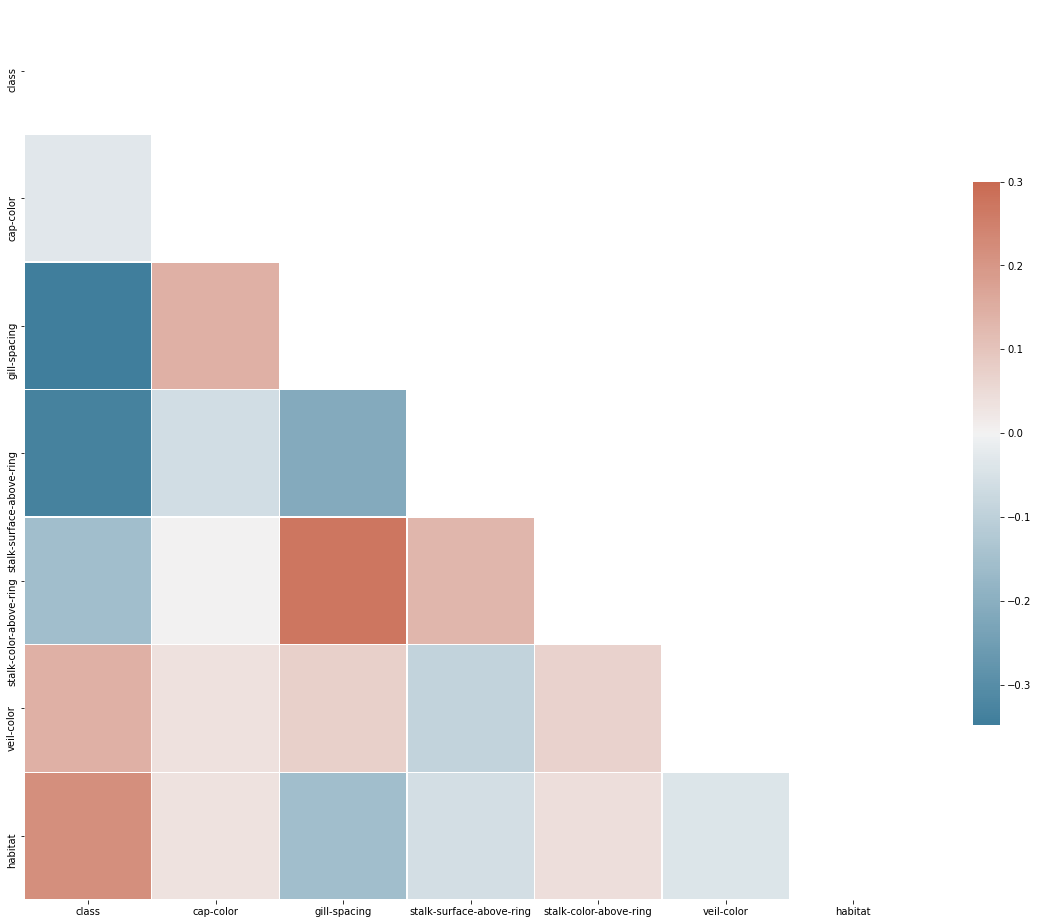

In [13]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [14]:
from numpy.core.defchararray import add

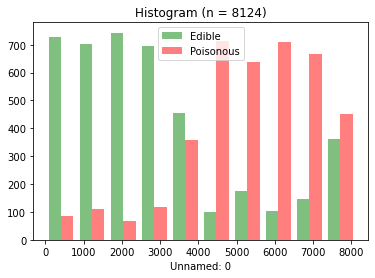

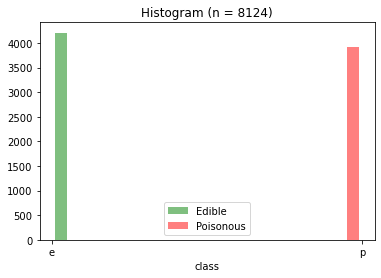

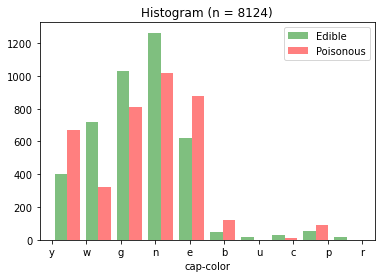

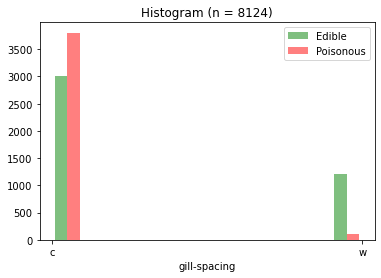

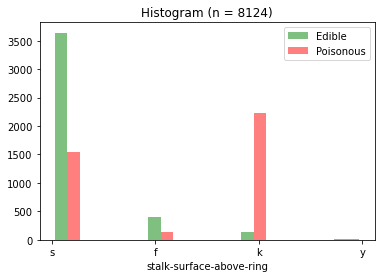

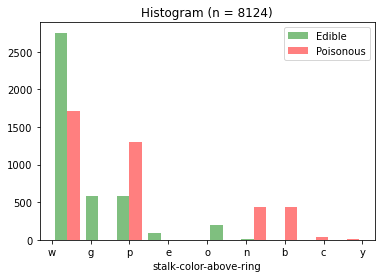

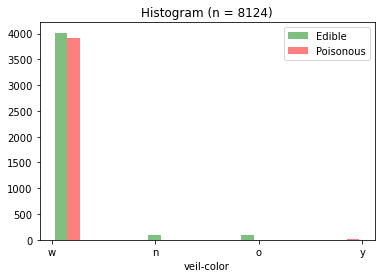

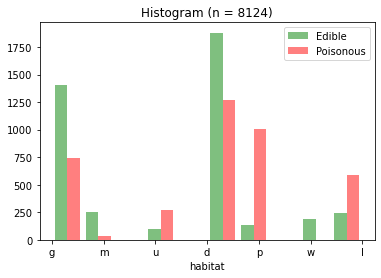

In [15]:
def histCompare(edf, pdf, feature):
    '''Plot a dual histogram of edible and poisonous mushrooms for a 
    certain feature.
    @param edf --> (pandas dataframe) a dataframe of edible mushrooms
    @param pdf --> (pandas dataframe) a dataframe of poisonous mushrooms
    @param feature --> (string) the name of the feature to be compared
    '''
    e_array = list(edf[feature])
    p_array = list(pdf[feature])
    plt.hist([e_array, p_array], color=['g', 'r'], alpha=0.5)
    plt.xlabel(feature)
    plt.title('Histogram (n = 8124)')
    plt.legend(['Edible', 'Poisonous'])
    plt.show()

# read in .csv data as pandas dataframe
mushroom_df = pd.read_csv('mushrooms_ambiguous_6feat.csv', encoding='utf-8')

# separate dataframe by class
edible_df = mushroom_df.loc[mushroom_df['class'] == 'e']
poisonous_df = mushroom_df.loc[mushroom_df['class'] == 'p']

# obtain list of features
features = list(mushroom_df)

# generate comparative histograms for each feature
for feat in features:
    histCompare(edible_df, poisonous_df, feat)

## 3. Feature engineering

Goals
- Use dummy variables to represent categorical data containing > 2 categories
- Use binary variables to represent features containing 2 categories
- Omit collinear, heavily skewed, or otherwise flawed features


In [16]:
def encodeDummy(df, feature):
    '''Encode a given feature into dummy variables, omitting the first
    alphabetically-sorted category. Remove the original feature.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @return df --> (pandas dataframe) modified dataframe
    '''
    labels = np.unique(df[feature])
    labels = add(feature, labels)
    le = LabelEncoder()
    dummy_labels = le.fit_transform(df[feature])
    df[feature] = dummy_labels
    dummy_features = pd.get_dummies(df[feature], drop_first=True)
    df[labels[1:]] = dummy_features
    return df.drop(feature, axis=1)
    

def encodeBinary(df, feature, positive):
    '''Encode a given feature into a binary variable with 'positive' as 1 and
    all other values as 0.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @param positive --> (str) category to be a positive binary
    @return df --> (pandas dataframe) modified dataframe
    '''
    positive_arr = df[feature] == positive
    df.loc[positive_arr, feature] = 1
    df.loc[~positive_arr, feature] = 0
    return df

def encodeOmit(df, feature):
    '''Omit feature from dataframe.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @return df --> (pandas dataframe) modified dataframe
    '''
    return df.drop(feature, axis=1)

# read in .csv data as pandas dataframe
mushroom_df = pd.read_csv('mushrooms_ambiguous_6feat.csv', encoding='utf-8')

# select features to encode or omit:['class','cap-shape','cap-surface','cap-color',\
    #'gill-attachment','gill-spacing','stalk-shape','stalk-root','stalk-surface-above-ring',\
    #'stalk-color-above-ring','veil-color','ring-number','habitat']
my_dummies = ['cap-color', 
              'stalk-surface-above-ring', 
              'stalk-color-above-ring','habitat']

my_binaries = [('class', 'e'), 
               ('gill-spacing', 'c')]

my_omissions = ['veil-color']


for feat in my_dummies:
    mushroom_df = encodeDummy(mushroom_df, feat)
for feat, pos in my_binaries:
    mushroom_df = encodeBinary(mushroom_df, feat, pos)
for feat in my_omissions:
    mushroom_df = encodeOmit(mushroom_df, feat)


mushroom_df.to_csv('mushrooms_encoded_amb_6feat.csv')

In [17]:
data = pd.read_csv('mushrooms_encoded_amb_6feat.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,class,gill-spacing,cap-colorc,cap-colore,cap-colorg,cap-colorn,cap-colorp,cap-colorr,cap-coloru,cap-colorw,cap-colory,stalk-surface-above-ringk,stalk-surface-above-rings,stalk-surface-above-ringy,stalk-color-above-ringc,stalk-color-above-ringe,stalk-color-above-ringg,stalk-color-above-ringn,stalk-color-above-ringo,stalk-color-above-ringp,stalk-color-above-ringw,stalk-color-above-ringy,habitatg,habitatl,habitatm,habitatp,habitatu,habitatw
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,2,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,3,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [18]:
data = data.drop(data.columns[0:2], axis=1) # omit index column
data.head()

,class,gill-spacing,cap-colorc,cap-colore,cap-colorg,cap-colorn,cap-colorp,cap-colorr,cap-coloru,cap-colorw,cap-colory,stalk-surface-above-ringk,stalk-surface-above-rings,stalk-surface-above-ringy,stalk-color-above-ringc,stalk-color-above-ringe,stalk-color-above-ringg,stalk-color-above-ringn,stalk-color-above-ringo,stalk-color-above-ringp,stalk-color-above-ringw,stalk-color-above-ringy,habitatg,habitatl,habitatm,habitatp,habitatu,habitatw
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [19]:
data.shape

(8124, 28)

## 4. Machine Learning Models

### Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

In [21]:
X = data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=41)

In [22]:
clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test, predicted),3)))
print("Precision score is: " + str(round(precision_score(y_test, predicted),3)))
print("F1 score is: " + str(round(f1_score(y_test, predicted),3)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 0.8838010832102413
Recall score is: 0.952
Precision score is: 0.844
F1 score is: 0.895

Confusion matrix:
[[ 794  185]
 [  51 1001]]


In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8812762887558889

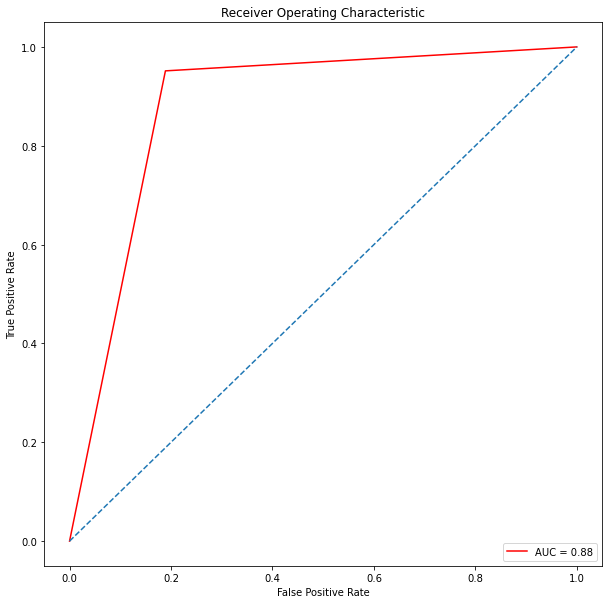

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [25]:
#Tuned model
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
                    'penalty':['l1','l2']
                   }

from sklearn.model_selection import GridSearchCV
LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

LR.fit(X_train,y_train)

print(LR.best_params_)

y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_test)

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

{'C': 100, 'penalty': 'l2'}


0.9005416051206302

array([[ 810,  169],
       [  33, 1019]])

In [26]:
#data.corr()

In [27]:
LR_model= LogisticRegression(C=100)

clf2 = LR_model.fit(X_train,y_train)
predicted = clf2.predict(X_test)
predicted_proba = clf2.predict(X_test)

print("Accuracy is: "+ str(clf2.score(X_test,y_test)))

Accuracy is: 0.9005416051206302


In [28]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8980030255129585

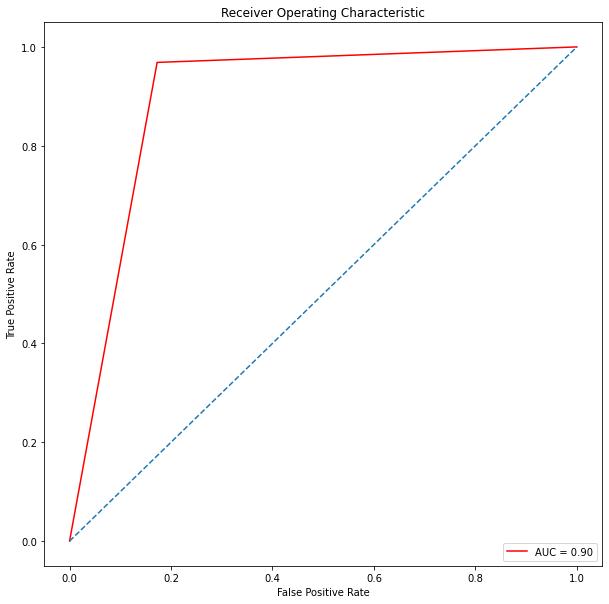

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

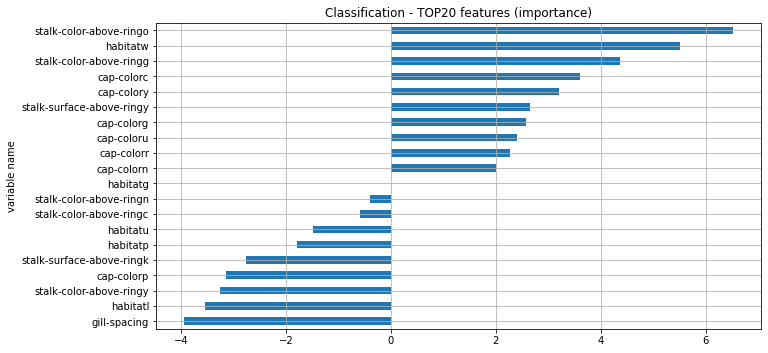

In [30]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)");

In [31]:
Importance_Ranking = pd.concat([importance["value"].head(40),importance["value"].tail(40)]).sort_values(ascending=False)
Importance_Ranking

name
stalk-color-above-ringo      6.52857
stalk-color-above-ringo      6.52857
habitatw                     5.50309
habitatw                     5.50309
stalk-color-above-ringg      4.37407
stalk-color-above-ringg      4.37407
cap-colorc                   3.59620
cap-colorc                   3.59620
cap-colory                   3.21131
cap-colory                   3.21131
stalk-surface-above-ringy    2.64670
stalk-surface-above-ringy    2.64670
cap-colorg                   2.56971
cap-colorg                   2.56971
cap-coloru                   2.41087
cap-coloru                   2.41087
cap-colorr                   2.26080
cap-colorr                   2.26080
cap-colorn                   1.99570
cap-colorn                   1.99570
stalk-color-above-ringe      1.70372
stalk-color-above-ringe      1.70372
cap-colore                   1.67640
cap-colore                   1.67640
habitatm                     1.59079
habitatm                     1.59079
stalk-surface-above-rings    1.50

### Naive Bayes Model

In [32]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB()

In [33]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_test)

0.6459871984244214

In [34]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 2031 points : 719


In [35]:
scores = cross_val_score(model_naive, X_test, y_test, cv=10, scoring='accuracy')
print((scores).mean())

0.6238385009176085


In [36]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[974,   5],
       [714, 338]])

In [37]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.6580927616835678

### Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [39]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

RandomForestClassifier(max_depth=5)

0.8882323978335795

In [40]:
predictions = rf.predict(X_test)
rf.score(X_test , y_test)

0.8783850320039389

In [41]:
accuracy_score(y_test , predictions)

0.8783850320039389

### Decision Tree

In [42]:
X = df.drop(['class'], axis=1) #切换dataset
y = df['class']

#X = data.iloc[:,1:23]  # 所有行、所有功能和无标签
#y = data.iloc[:,0]  # 所有行，仅标签
X.head()
y.head()

,cap-color,gill-spacing,stalk-surface-above-ring,stalk-color-above-ring,veil-color,habitat
0,4,0,2,7,2,5
1,9,0,2,7,2,1
2,8,0,2,7,2,3
3,8,0,2,7,2,5
4,3,1,2,7,2,1


0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape

(6499, 6)

In [44]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score

0.9113846153846153

In [45]:
clf.feature_importances_  

array([0.1268923 , 0.37731167, 0.23886498, 0.12906673, 0.00713325,
       0.12073107])

In [46]:
feature_name=['cap-color',\
    'gill-spacing','stalk-surface-above-ring',\
              'stalk-color-above-ring','veil-color','habitat']

print(len(feature_name))

6


In [47]:
[*zip(feature_name,clf.feature_importances_)]

[('cap-color', 0.1268923002098262),
 ('gill-spacing', 0.37731167202277044),
 ('stalk-surface-above-ring', 0.23886498211781598),
 ('stalk-color-above-ring', 0.12906672854384135),
 ('veil-color', 0.007133245141681513),
 ('habitat', 0.12073107196406446)]

In [48]:
clf=tree.DecisionTreeClassifier(criterion='entropy'      
                                ,random_state=30
                                ,splitter='random')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score

0.9113846153846153

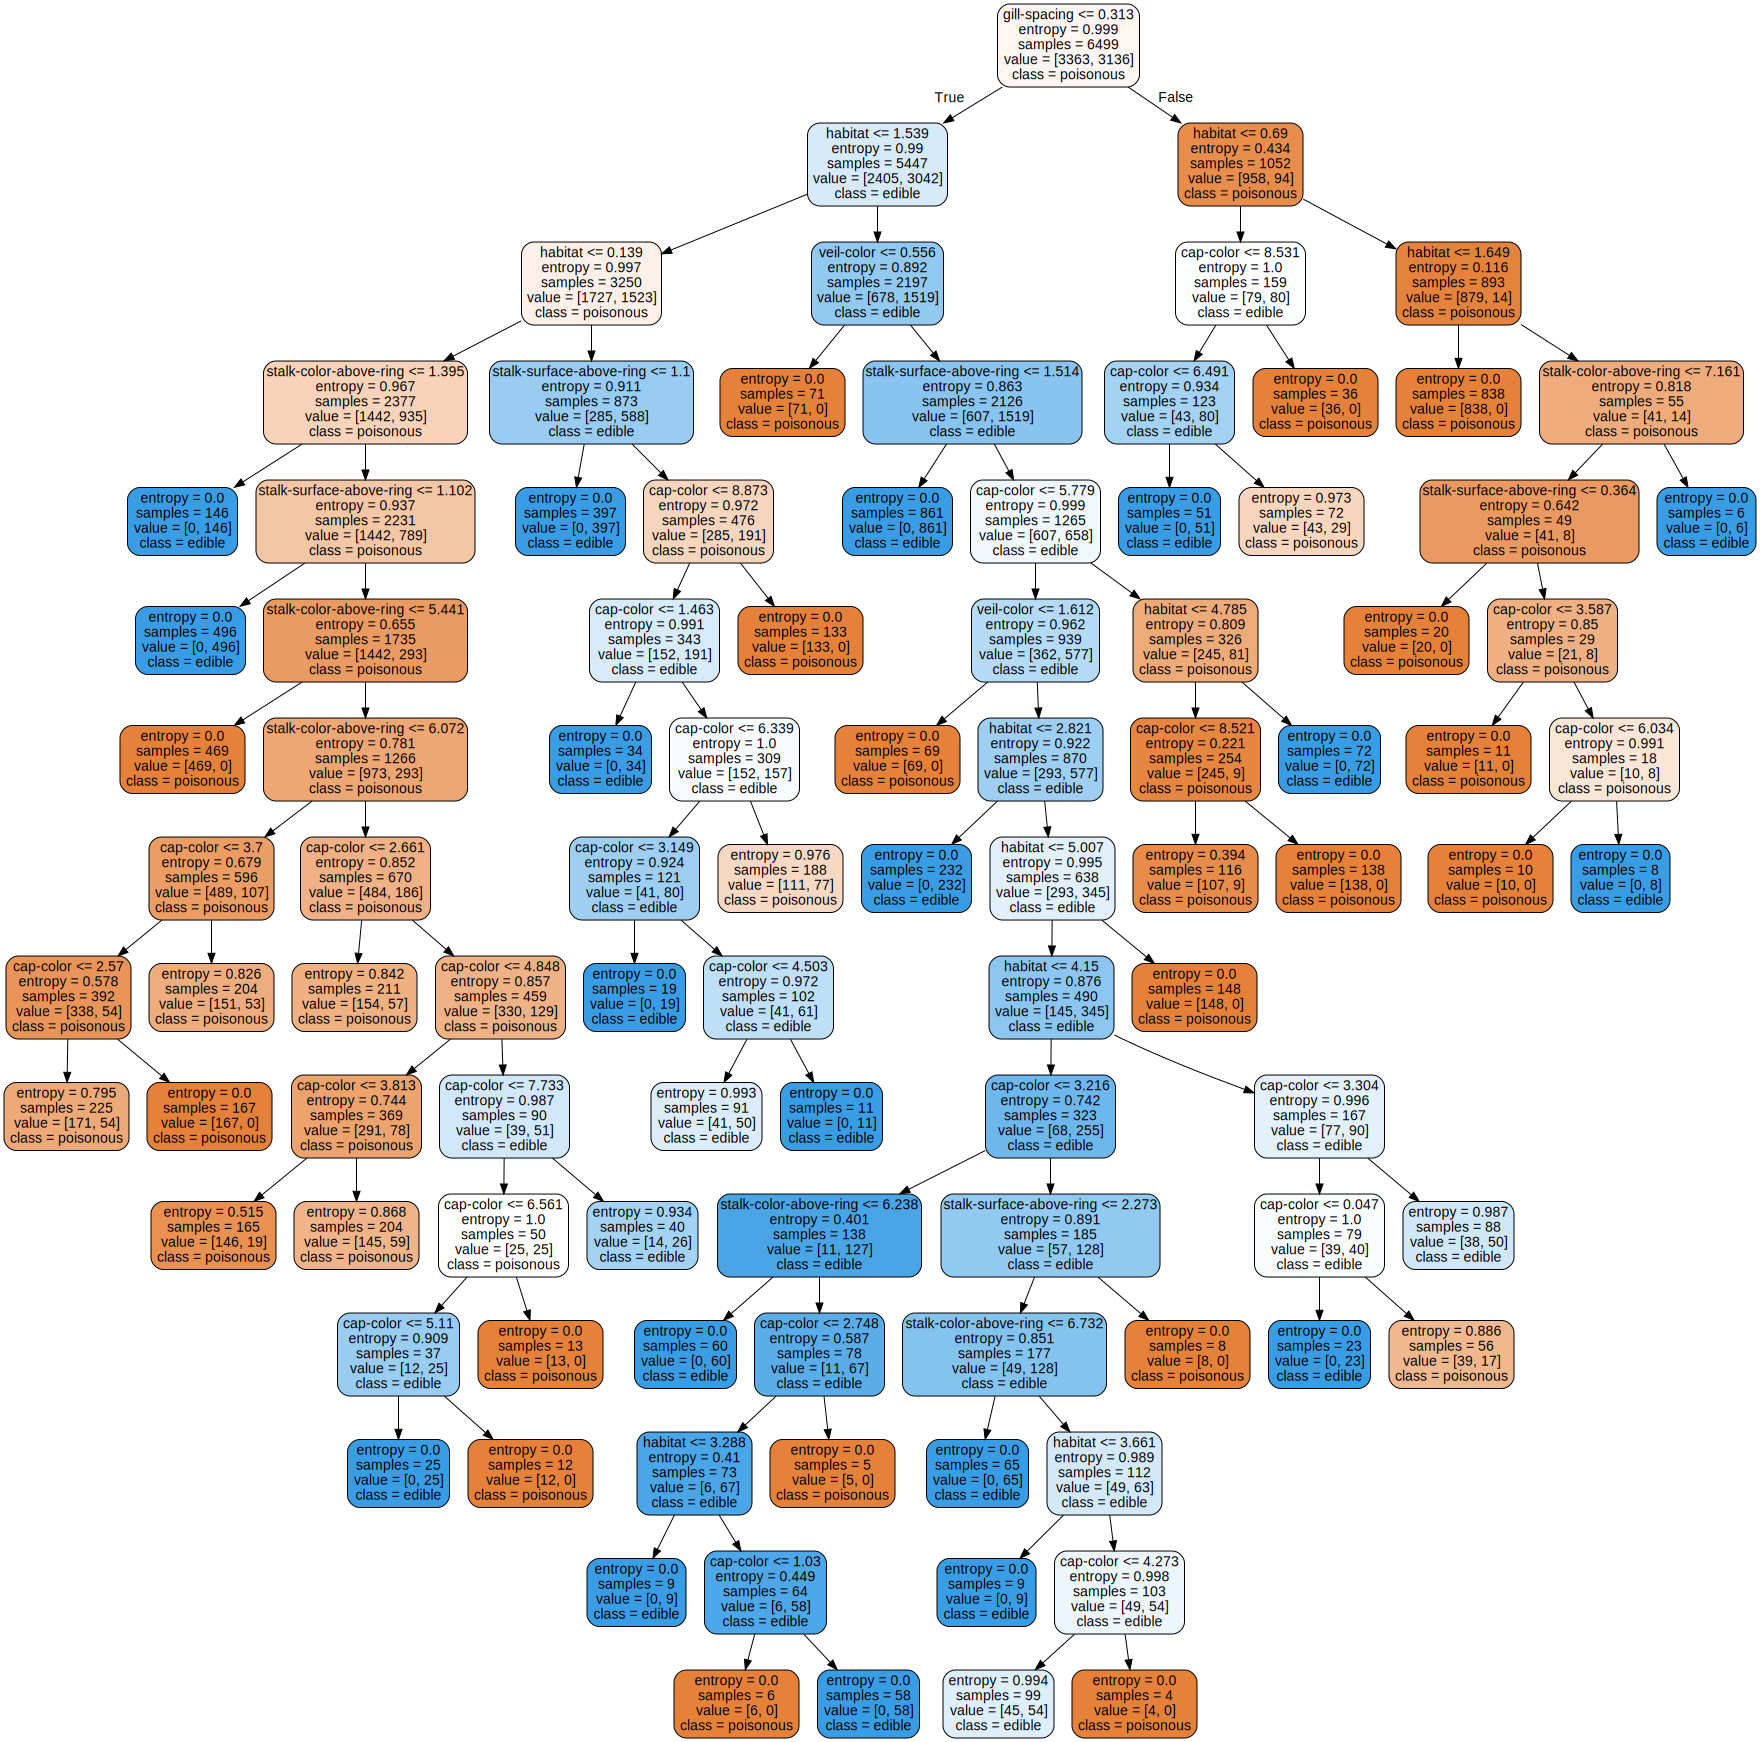

In [49]:
import graphviz
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['poisonous','edible']
                             ,filled=True
                             ,rounded=True)
graph=graphviz.Source(dot_data)
graph

Text(0.5, 1.0, 'Normalized Confusion Matrix of Mushroom Dataset')

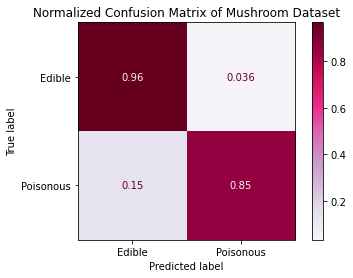

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

### Neural Networks

In [51]:
data = data.sample(frac=1)  #shuffle encoded data
# partition into training (60%), validation (20%), and test set (20%)
samples = data.shape[0]
train_count = round(samples * 0.6)
val_count = round(samples * 0.2)
test_count = samples - train_count - val_count

train_df = data.iloc[:train_count]
validation_df = data.iloc[train_count:train_count + val_count]
test_df = data.iloc[-test_count:]

X_train = train_df.drop(['class'], axis=1)
X_validation = validation_df.drop(['class'], axis=1)
X_test = test_df.drop(['class'], axis=1)

y_train = train_df['class']
y_validation = validation_df['class']
y_test = test_df['class']

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import mglearn
from sklearn.neural_network import MLPRegressor

In [53]:
# Basic Neural Networks model
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train)*100)
print(mlp.score(X_validation, y_validation)*100)
print(mlp.score(X_test, y_test)*100)

92.30611407468199
91.38461538461539
91.32307692307691


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# hyperparameter tuning: alpha

pipe = make_pipeline(MLPClassifier(solver="lbfgs", max_iter = 5000, random_state=0))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid, return_train_score=True)

In [55]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mlpclassifier',
                                        MLPClassifier(max_iter=5000,
                                                      random_state=0,
                                                      solver='lbfgs'))]),
             param_grid={'mlpclassifier__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True)

In [56]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])

In [57]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.77302,0.15719,0.00282,0.00039,0.00100,{'mlpclassifier__alpha': 0.001},0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
1,1.46104,0.55072,0.00227,0.00011,0.01000,{'mlpclassifier__alpha': 0.01},0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
2,4.23673,0.95797,0.00258,0.00037,0.10000,{'mlpclassifier__alpha': 0.1},0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
3,7.93288,1.21416,0.00246,0.00017,1.00000,{'mlpclassifier__alpha': 1.0},0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
4,9.85988,2.78350,0.00262,0.00028,10.00000,{'mlpclassifier__alpha': 10.0},0.90974,0.93333,0.91590,0.91282,0.92813,0.91999,0.00914,5,0.92229,0.91921,0.92357,0.92280,0.91846,0.92127,0.00204
5,2.04316,0.58788,0.00268,0.00038,100.00000,{'mlpclassifier__alpha': 100.0},0.87487,0.88410,0.87179,0.86872,0.87269,0.87444,0.00522,6,0.88048,0.87125,0.87433,0.87510,0.87410,0.87505,0.00301
6,0.09777,0.00149,0.00246,0.00015,1000.00000,{'mlpclassifier__alpha': 1000.0},0.51487,0.51487,0.51487,0.51487,0.51437,0.51477,0.00020,7,0.51475,0.51475,0.51475,0.51475,0.51487,0.51477,0.00005


In [58]:
res

,mean_test_score,mean_train_score
param_mlpclassifier__alpha,,
0.00100,0.92183,0.92316
0.01000,0.92183,0.92316
0.10000,0.92183,0.92316
1.00000,0.92183,0.92316
10.00000,0.91999,0.92127
100.00000,0.87444,0.87505
1000.00000,0.51477,0.51477


In [60]:
# hyperparameter tuning: hidden_layer_sizes

pipe = make_pipeline( MLPClassifier(solver="lbfgs", random_state=0))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(pipe, param_grid,return_train_score=True)

In [61]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mlpclassifier',
                                        MLPClassifier(random_state=0,
                                                      solver='lbfgs'))]),
             param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (500,),
                                                               (10, 10),
                                                               (50, 50),
                                                               (100, 100),
                                                               (500, 500)]},
             return_train_score=True)

In [62]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.29480,0.03572,0.00206,0.00020,"(10,)","{'mlpclassifier__hidden_layer_sizes': (10,)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
1,0.45846,0.05227,0.00212,0.00019,"(50,)","{'mlpclassifier__hidden_layer_sizes': (50,)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
2,1.03480,0.15228,0.00226,0.00007,"(100,)","{'mlpclassifier__hidden_layer_sizes': (100,)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
3,4.61382,0.54831,0.00972,0.00100,"(500,)","{'mlpclassifier__hidden_layer_sizes': (500,)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
4,0.57471,0.02495,0.00238,0.00028,"(10, 10)","{'mlpclassifier__hidden_layer_sizes': (10, 10)}",0.91590,0.92923,0.91590,0.91590,0.93018,0.92142,0.00677,8,0.92485,0.92049,0.92357,0.92485,0.92128,0.92301,0.00181
5,1.37248,0.16503,0.00302,0.00027,"(50, 50)","{'mlpclassifier__hidden_layer_sizes': (50, 50)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
6,3.07174,0.66735,0.00486,0.00020,"(100, 100)","{'mlpclassifier__hidden_layer_sizes': (100, 100)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188
7,25.93888,2.89260,0.02079,0.00114,"(500, 500)","{'mlpclassifier__hidden_layer_sizes': (500, 500)}",0.91590,0.92923,0.91795,0.91590,0.93018,0.92183,0.00648,1,0.92485,0.92049,0.92434,0.92485,0.92128,0.92316,0.00188


In [63]:
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

In [64]:
res

,mean_test_score,mean_train_score,std_test_score,std_train_score
param_mlpclassifier__hidden_layer_sizes,,,,
"(10,)",0.92183,0.92316,0.00648,0.00188
"(10, 10)",0.92142,0.92301,0.00677,0.00181
"(50,)",0.92183,0.92316,0.00648,0.00188
"(50, 50)",0.92183,0.92316,0.00648,0.00188
"(100,)",0.92183,0.92316,0.00648,0.00188
"(100, 100)",0.92183,0.92316,0.00648,0.00188
"(500,)",0.92183,0.92316,0.00648,0.00188
"(500, 500)",0.92183,0.92316,0.00648,0.00188


### DNN (Deep Neural Networks)

In [65]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import binary_crossentropy
from keras.layers import Dense, Activation

In [66]:
num_features = data.shape[1] - 1
num_features

27

In [67]:
### Build neural network architecture ###
num_features = data.shape[1] - 1

model = Sequential([
    Dense(16, input_shape=(num_features,)),
    Activation('relu'),
    Dense(12),
    Activation('relu'),
    Dense(8),
    Activation('relu'),
    Dense(4),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid')
])


In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                448       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3

In [70]:
my_epochs =50
history = model.fit(X_train, y_train, epochs=my_epochs, batch_size=20,
                    validation_data=(X_test, y_test))

Epoch 1/50
244/244 [==============================] - 2s 4ms/step - loss: 0.5995 - binary_accuracy: 0.7192 - val_loss: 0.3042 - val_binary_accuracy: 0.8794
Epoch 2/50
244/244 [==============================] - 0s 1ms/step - loss: 0.2744 - binary_accuracy: 0.8924 - val_loss: 0.2387 - val_binary_accuracy: 0.8923
Epoch 3/50
244/244 [==============================] - 0s 1ms/step - loss: 0.2210 - binary_accuracy: 0.9027 - val_loss: 0.2188 - val_binary_accuracy: 0.8978
Epoch 4/50
244/244 [==============================] - 0s 993us/step - loss: 0.2064 - binary_accuracy: 0.9059 - val_loss: 0.2076 - val_binary_accuracy: 0.9083
Epoch 5/50
244/244 [==============================] - 0s 965us/step - loss: 0.1989 - binary_accuracy: 0.9126 - val_loss: 0.2016 - val_binary_accuracy: 0.9089
Epoch 6/50
244/244 [==============================] - 0s 1ms/step - loss: 0.1980 - binary_accuracy: 0.9134 - val_loss: 0.1975 - val_binary_accuracy: 0.9071
Epoch 7/50
244/244 [==============================] - 0s 1ms

In [71]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.48216,0.80427,0.30421,0.87938
1,0.25789,0.89290,0.23871,0.89231
2,0.22292,0.89988,0.21885,0.89785
3,0.20873,0.90685,0.20756,0.90831
4,0.20129,0.91198,0.20160,0.90892
5,0.19249,0.91465,0.19747,0.90708
6,0.19080,0.91547,0.20129,0.90769
7,0.19014,0.91342,0.19115,0.90954
8,0.18702,0.91239,0.19014,0.90954
9,0.18301,0.91444,0.18875,0.90954


<AxesSubplot:>

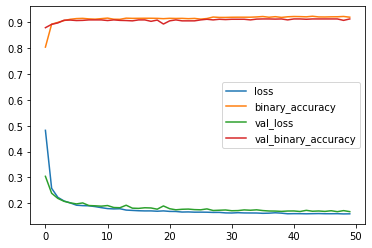

In [72]:
pd.DataFrame(history.history).plot()

In [73]:
score = model.evaluate(X_validation, y_validation, verbose=0)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)


print("Validation Accuracy: {:.2f}".format(score[1]*100))
print('Test Accuracy: %.2f' % (accuracy*100))

Validation Accuracy: 91.38
Test Accuracy: 91.32


Use dropout to prevent overfitting

In [74]:
from keras.layers import Dropout

num_features = data.shape[1] - 1

model_dropout = Sequential([
    Dense(16, input_shape=(num_features,)),
    Activation('relu'),
    Dropout(.5),
    Dense(12),
    Activation('relu'),
    Dropout(.5),
    Dense(8),
    Activation('relu'),
    Dropout(.5),
    Dense(4),
    Activation('relu'),
    Dropout(.5),
    Dense(1),
    Activation('sigmoid')
])

model_dropout.compile("adam", "binary_crossentropy", metrics=['binary_accuracy'])

my_epochs = 50
history_dropout = model_dropout.fit(X_train, y_train, epochs=my_epochs, batch_size=20,
                    validation_data=(X_test, y_test))


Epoch 1/50
244/244 [==============================] - 1s 2ms/step - loss: 0.7522 - binary_accuracy: 0.5059 - val_loss: 0.6906 - val_binary_accuracy: 0.5280
Epoch 2/50
244/244 [==============================] - 0s 1ms/step - loss: 0.6895 - binary_accuracy: 0.5355 - val_loss: 0.6835 - val_binary_accuracy: 0.5877
Epoch 3/50
244/244 [==============================] - 0s 1ms/step - loss: 0.6669 - binary_accuracy: 0.5740 - val_loss: 0.6011 - val_binary_accuracy: 0.8018
Epoch 4/50
244/244 [==============================] - 0s 1ms/step - loss: 0.6263 - binary_accuracy: 0.6357 - val_loss: 0.4951 - val_binary_accuracy: 0.8320
Epoch 5/50
244/244 [==============================] - 0s 1ms/step - loss: 0.5974 - binary_accuracy: 0.6753 - val_loss: 0.4456 - val_binary_accuracy: 0.8554
Epoch 6/50
244/244 [==============================] - 0s 1ms/step - loss: 0.5634 - binary_accuracy: 0.7140 - val_loss: 0.4219 - val_binary_accuracy: 0.8609
Epoch 7/50
244/244 [==============================] - 0s 1ms/ste

In [75]:
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                448       
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                204       
_________________________________________________________________
activation_6 (Activation)    (None, 12)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                

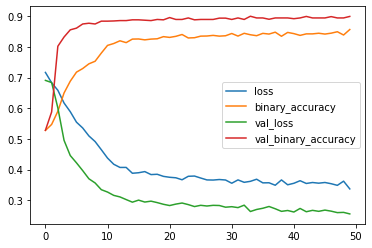

In [76]:
df = pd.DataFrame(history_dropout.history).plot()

In [77]:
score = model_dropout.evaluate(X_validation, y_validation, verbose=0)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)


print("Validation Accuracy: {:.2f}".format(score[1]*100))
print('Test Accuracy: %.2f' % (accuracy*100))

Validation Accuracy: 90.58
Test Accuracy: 91.32


## Bundled Together

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X = data.drop(['class'], axis=1)
y = data['class']
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((6499, 6), (6499,))

((1625, 6), (1625,))

In [79]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [80]:
names = ["Logistic_Regression", "Logistic_Regression_Tuned", "Nearest_Neighbors", "Linear_SVM", 
         "Polynomial_SVM", "Gradient_Boosting", 
         "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    LogisticRegression(solver="lbfgs"),
    LogisticRegression(solver="lbfgs", C=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=10),
    SVC(kernel="poly", degree=3, C=10),
#     SVC(kernel="rbf", C=1, gamma=2),  #, "RBF_SVM"
#     GaussianProcessClassifier(1.0 * RBF(1.0)),  #"Gaussian_Process",
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha = 1, hidden_layer_sizes=50, max_iter=1000, random_state=0),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [81]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

LogisticRegression()

LogisticRegression(C=100)

KNeighborsClassifier(n_neighbors=3)

SVC(C=10, kernel='linear')

SVC(C=10, kernel='poly')

GradientBoostingClassifier(learning_rate=1.0)

DecisionTreeClassifier(max_depth=5)

ExtraTreesClassifier(n_estimators=10)

RandomForestClassifier(max_depth=5)

MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000, random_state=0)

AdaBoostClassifier(n_estimators=100)

GaussianNB()

QuadraticDiscriminantAnalysis()

SGDClassifier()

In [82]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by="score", ascending=False)

,name,score
5,Gradient_Boosting,0.93169
7,Extra_Trees,0.93169
4,Polynomial_SVM,0.91446
8,Random_Forest,0.91200
9,Neural_Net,0.90892
10,AdaBoost,0.89723
2,Nearest_Neighbors,0.88923
6,Decision_Tree,0.87200
0,Logistic_Regression,0.84492
1,Logistic_Regression_Tuned,0.84062


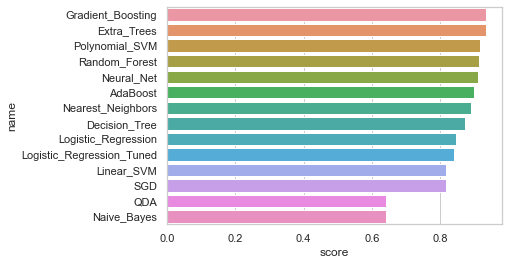

In [83]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df.sort_values(by="score", ascending=False))